In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
imgPath = '/home/thura/Desktop/computer-vision-and-DL/CV-course1/7 - Canny Edge Detector/images/cm.jpg'
img = plt.imread(imgPath)

In [2]:
def Gx(s, sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    
    Gx = np.zeros((s, s))  # gaussina matrix
    
    for x in range(minX, maxX+1):
        for y in range(minY, maxY+1):
            v = (-x/(2*np.pi*(sigma**4)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            Gx[x-minX, y-minY] = v  # G[0, 0] = v
    return Gx

In [7]:
def Gy(s, sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    
    Gy = np.zeros((s, s))  # gaussina matrix
    
    for x in range(minX, maxX+1):
        for y in range(minY, maxY+1):
            v = (-y/(2*np.pi*(sigma**4)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            Gy[x-minX, y-minY] = v  # G[0, 0] = v
    return Gy

In [8]:
gx = Gx(3, 0.5)
gy = Gy(3, 0.5)

In [9]:
gx

array([[ 0.04664039,  0.34462847,  0.04664039],
       [ 0.        ,  0.        ,  0.        ],
       [-0.04664039, -0.34462847, -0.04664039]])

In [10]:
gy

array([[ 0.04664039,  0.        , -0.04664039],
       [ 0.34462847,  0.        , -0.34462847],
       [ 0.04664039,  0.        , -0.04664039]])

In [12]:
img.shape

(225, 224, 3)

In [13]:
img = np.float64(img[:, :, 0])

In [14]:
Ix = cv2.filter2D(img, -1, gx)
Iy = cv2.filter2D(img, -1, gy)

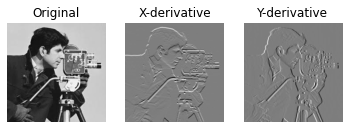

In [15]:
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(132)
plt.imshow(Ix, cmap='gray')
plt.axis('off')
plt.title('X-derivative')
plt.subplot(133)
plt.imshow(Iy, cmap='gray')
plt.axis('off')
plt.title('Y-derivative')
plt.show()